<a href="https://colab.research.google.com/github/chahyeonseong/chahyeonseong/blob/main/diet_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#함수 다운로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
import numpy as np

In [16]:
#폰트다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [56]:
df=pd.read_excel("/content/drive/MyDrive/online_diet (real).xlsx")
df

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,seq_num,id,social_id1,age,zip_code,occupation,sex,height,weight,married,...,diet_purpose,diet,bmi,order_id,pfid,pclass,p_name,p_price,p_created,p_quantity
0,28,webinner,740101.0,26.0,137-070,6.0,1.0,170.0,62.0,0.0,...,3.0,4,21.0,16560,MDGLIKE001,3,"오레그 O다리,X다리 교정벨트(고급형)",27000,2001-05-17 오후 1:10:38,1
1,29,webinner,740101.0,26.0,137-070,6.0,1.0,170.0,62.0,0.0,...,3.0,4,21.0,16926,MDGLIKE001,3,"오레그 O다리,X다리 교정벨트(고급형)",27000,2001-05-17 오후 1:26:33,1
2,30,webinner,740101.0,26.0,137-070,6.0,1.0,170.0,62.0,0.0,...,3.0,4,21.0,16941,MDGLIKE001,3,"오레그 O다리,X다리 교정벨트(고급형)",27000,2001-05-17 오후 2:19:23,1
3,31,webinner,740101.0,26.0,137-070,6.0,1.0,170.0,62.0,0.0,...,3.0,4,21.0,16944,MDGLIKE001,3,"오레그 O다리,X다리 교정벨트(고급형)",27000,2001-05-17 오후 2:27:24,1
4,32,webinner,740101.0,26.0,137-070,6.0,1.0,170.0,62.0,0.0,...,3.0,4,21.0,16967,MDGBEAT004,3,아로마 장미향,20000,2001-05-17 오후 4:25:11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,2011,0162655575,830219.0,17.0,135-080,15.0,2.0,165.0,49.0,0.0,...,1.0,NaN,17.0,21654,MDEHRWE008,2,파워세라믹종아리 다이어트,29900,2001-07-05 오후 7:17:10,1
4454,2012,12girl,781007.0,22.0,136-043,17.0,2.0,160.0,63.0,0.0,...,3.0,NaN,24.0,21656,PDFMEAL014,1,풀무원 드림다이어트,300000,2001-07-05 오후 8:02:18,1
4455,2013,onlyonelhm,880330.0,12.0,327-030,15.0,2.0,159.0,58.0,0.0,...,1.0,NaN,22.0,21664,MDEHRWE008,2,파워세라믹종아리 다이어트,29900,2001-07-06 오전 1:17:45,1
4456,2014,morebest1,760709.0,24.0,0000000,12.0,1.0,177.0,109.0,0.0,...,3.0,"1, 4, 5",34.0,21665,MDFMEAL007,1,대상다이어트프로그램,70000,2001-07-06 오전 1:50:12,1


In [57]:
#필요없는 열 제거
df = df.drop(['seq_num', 'social_id1', 'zip_code'
         , 'waist','heap', 'loss_part','order_id', 'pfid',
      'p_name', 'p_price', 'p_quantity'], axis=1)

#EDA

In [58]:
#데이터 크기 확인
print("데이터의 크기:", df.shape)

데이터의 크기: (4458, 15)


In [59]:
#데이터의 정보 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4458 non-null   object 
 1   age           4457 non-null   float64
 2   occupation    4456 non-null   float64
 3   sex           4456 non-null   float64
 4   height        4456 non-null   float64
 5   weight        4456 non-null   float64
 6   married       4456 non-null   float64
 7   dise          2930 non-null   object 
 8   want_diet     4456 non-null   float64
 9   created       4458 non-null   object 
 10  diet_purpose  4183 non-null   float64
 11  diet          3411 non-null   object 
 12  bmi           4456 non-null   float64
 13  pclass        4458 non-null   object 
 14  p_created     4458 non-null   object 
dtypes: float64(9), object(6)
memory usage: 522.5+ KB


In [60]:
#상위 5개 행 출력
df.head()

,id,age,occupation,sex,height,weight,married,dise,want_diet,created,diet_purpose,diet,bmi,pclass,p_created
0,webinner,26.0,6.0,1.0,170.0,62.0,0.0,NaN,61.0,2000-05-12 오후 3:38:49,3.0,4,21.0,3,2001-05-17 오후 1:10:38
1,webinner,26.0,6.0,1.0,170.0,62.0,0.0,NaN,61.0,2000-05-12 오후 3:38:49,3.0,4,21.0,3,2001-05-17 오후 1:26:33
2,webinner,26.0,6.0,1.0,170.0,62.0,0.0,NaN,61.0,2000-05-12 오후 3:38:49,3.0,4,21.0,3,2001-05-17 오후 2:19:23
3,webinner,26.0,6.0,1.0,170.0,62.0,0.0,NaN,61.0,2000-05-12 오후 3:38:49,3.0,4,21.0,3,2001-05-17 오후 2:27:24
4,webinner,26.0,6.0,1.0,170.0,62.0,0.0,NaN,61.0,2000-05-12 오후 3:38:49,3.0,4,21.0,3,2001-05-17 오후 4:25:11


In [61]:
#데이터 기술 통계
df.describe()

,age,occupation,sex,height,weight,married,want_diet,diet_purpose,bmi
count,4457.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4183.000000,4456.000000
mean,23.934261,12.263465,1.933348,162.844300,58.796618,0.172352,52.071432,2.043509,22.160682
std,7.418978,4.909294,0.249446,27.842875,12.085651,0.377728,8.679488,1.338650,22.764736
min,11.000000,1.000000,1.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.000000,12.000000,2.000000,159.000000,52.000000,0.000000,47.000000,1.000000,20.000000
50%,23.000000,15.000000,2.000000,162.000000,57.000000,0.000000,50.000000,1.000000,21.000000
75%,26.000000,15.000000,2.000000,165.000000,63.000000,0.000000,55.000000,3.000000,23.000000
max,100.000000,17.000000,2.000000,1965.000000,505.500000,1.000000,180.000000,5.000000,1495.000000


In [62]:
# 중복값 확인
df.duplicated().sum()

216

In [63]:
#각열의 고유값 출력
for col in df.columns:
    print(col, df[col].nunique())

id 3314
age 43
occupation 17
sex 2
height 103
weight 133
married 2
dise 15
want_diet 65
created 3314
diet_purpose 5
diet 236
bmi 39
pclass 5
p_created 4081


In [64]:
# 범주형 데이터 col에 들어있는 항목 확인
df['age'].unique()

array([ 26.,  24.,  25.,  16.,  35.,  27.,  20.,  18.,  23.,  21.,  22.,
        19.,  34.,  29.,  28.,  31.,  30.,  43.,  32.,  17.,  40.,  37.,
        42.,  38., 100.,  36.,  33.,  41.,  46.,  15.,  14.,  44.,  12.,
        13.,  39.,  45.,  11.,  50.,  49.,  47.,  48.,  53.,  55.,  nan])

In [65]:
#데이터 타입 확인
print(df.dtypes)

id               object
age             float64
occupation      float64
sex             float64
height          float64
weight          float64
married         float64
dise             object
want_diet       float64
created          object
diet_purpose    float64
diet             object
bmi             float64
pclass           object
p_created        object
dtype: object


#결측치 확인 및 대체, 제거

In [66]:
#결측치 확인
df.isnull().sum()

id                 0
age                1
occupation         2
sex                2
height             2
weight             2
married            2
dise            1528
want_diet          2
created            0
diet_purpose     275
diet            1047
bmi                2
pclass             0
p_created          0
dtype: int64

In [67]:
#occupation열에  결측치가 있는 행 제거
#325번tjddnjs627 / 2515번 JSCCI (2)의 [occupation / sex / height / weight] 네가지 항목에서 정보가 없는 것으로 확인되었음
#유의미한 정보라고 판단되지 않아서 제거하기로 결정
df = df.dropna(subset=['occupation'])

In [69]:
#결측치 재확인
df.isnull().sum()

id                 0
age                1
occupation         0
sex                0
height             0
weight             0
married            0
dise            1526
want_diet          0
created            0
diet_purpose     273
diet            1045
bmi                0
pclass             0
p_created          0
dtype: int64

In [70]:
#diet_purpose 값 확인
df['occupation'].unique()

array([ 6., 17., 15.,  4.,  3., 14., 12., 16.,  1.,  7., 13., 11.,  5.,
        2., 10.,  8.,  9.])

결측치는 파생변수 생성에서 유의미한 기능을 할 수도 있기 때문에 대체하거나 제거하지 않기로 결정

#RAW DATA이상치 확인 및 대체, 제거

##이상치 확인

<ipython-input-71-3c9330a0efdb>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


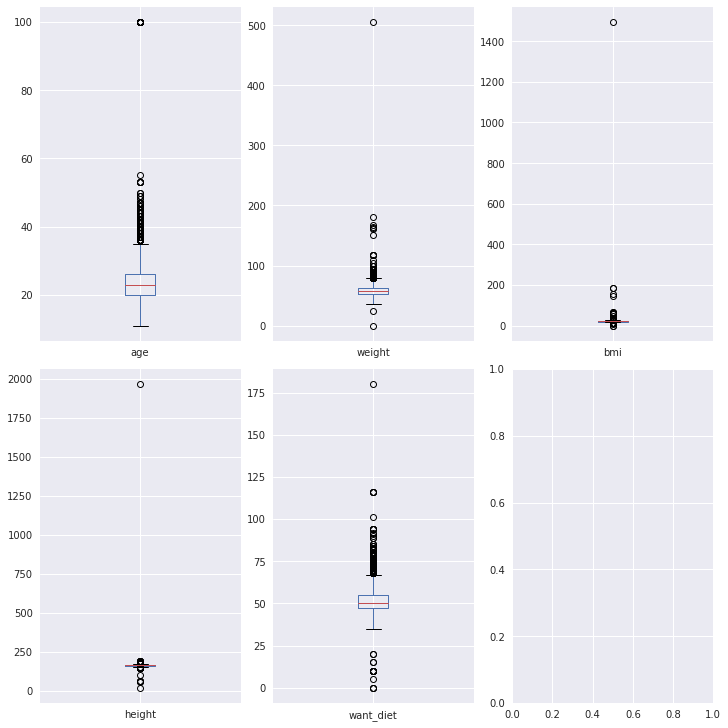

In [71]:
#이상치 제거 전 박스플롯 출력력
df_outlier = df.drop(['id', 'occupation', 'sex',  'married', 'dise', 'created', 'diet_purpose', 'diet', 'pclass', 'p_created'], axis=1)

%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumBarunGothic"

ncols = 3
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((10, 10))

for col, ax in zip(df_outlier.columns, axs.T.ravel()):
    df_outlier[[col]].boxplot(ax = ax)
    
plt.show()

##이상치 제거

In [72]:
#BMI 이상치제거
def func_bmi(x):
    if (x < 10) or (x > 50):
        return 0
    else:
        return 1

df["bmi_check"] = df["bmi"].map(func_bmi)
df = df[df["bmi_check"]==1]
df.drop(["bmi_check"], axis=1, inplace=True)

<ipython-input-72-a5f67bab56eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["bmi_check"], axis=1, inplace=True)


In [73]:
#height 이상치 제거
def func_height(x):
    if (x < 100) or (x > 200):
        return 0
    else:
        return 1

df["height_check"] = df["height"].map(func_height)
df = df[df["height_check"]==1]
df.drop(["height_check"], axis=1, inplace=True)

In [74]:
#weight 이상치 제거
def func_weight(x):
    if (x < 30) or (x > 150):
        return 0
    else:
        return 1

df["weight_check"] = df["weight"].map(func_weight)
df = df[df["weight_check"]==1]
df.drop(["weight_check"], axis=1, inplace=True)

In [75]:
#age 이상치 제거
def func_age(x):
    if (x < 10) or (x > 99):
        return 0
    else:
        return 1

df["age_check"] = df["age"].map(func_age)
df = df[df["age_check"]==1]
df.drop(["age_check"], axis=1, inplace=True)

<ipython-input-75-5db4fd6b708b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["age_check"], axis=1, inplace=True)


In [76]:
#want_diet 이상치 제거
def func_want_diet(x):
    if (x < 30):
        return 0
    else:
        return 1

df["want_diet_check"] = df["want_diet"].map(func_want_diet)
df = df[df["want_diet_check"]==1]
df.drop(["want_diet_check"], axis=1, inplace=True)

<ipython-input-76-6a9e342bf2e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["want_diet_check"], axis=1, inplace=True)


이상치 제거 후 박스플롯

<ipython-input-78-62620905ff4c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


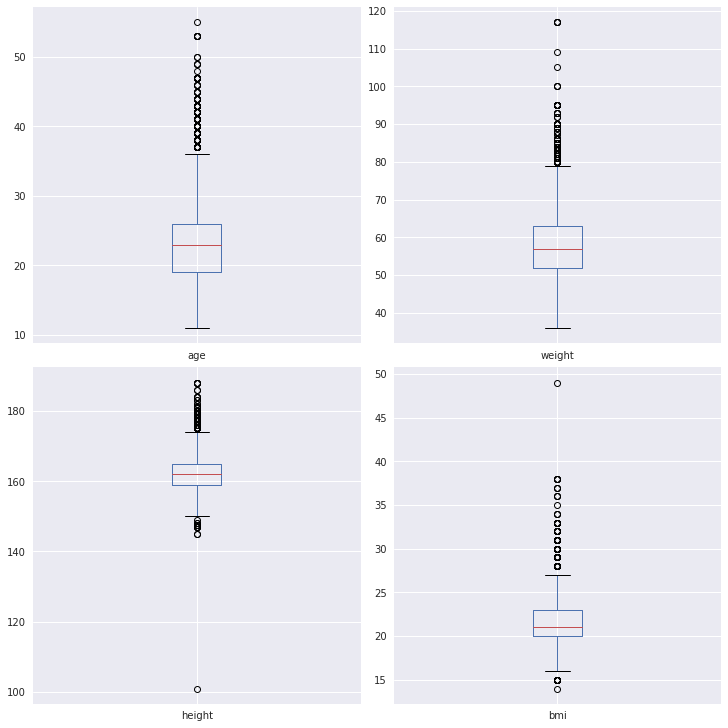

In [78]:
#이상치 제거 후 박스플롯 출력
df_outlier = df.drop(['id', 'occupation', 'sex',  'married', 'dise', 'created', 'diet_purpose', 'diet', 'pclass', 'p_created','want_diet'], axis=1)

%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumBarunGothic"

ncols = 2
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((10, 10))

for col, ax in zip(df_outlier.columns, axs.T.ravel()):
    df_outlier[[col]].boxplot(ax = ax)
    
plt.show()

#파생변수

##파생변수 생성

In [79]:
#질병유무라는 변수 생성후 질병이 있으면 1 없으면 0으로 나오는 코드
def convert_to_binary(x):
    if pd.isna(x) or x == '':
        return 0
    else:
        return 1

# 'dise'열에 대해서만 함수를 적용하여 1 또는 0으로 변경
df['Disease_status'] = df['dise'].apply(convert_to_binary)

In [80]:
#경험이이라는 변수 생성후 질병이 있으면 1 없으면 0으로 나오는 코드
def convert_to_binary(x):
    if pd.isna(x) or x == '':
        return 0
    else:
        return 1

# 'dise'열에 대해서만 함수를 적용하여 1 또는 0으로 변경
df['Diet_experience'] = df['diet'].apply(convert_to_binary)

In [81]:
#학생이냐 아니냐
def func_student(x):
    if (x == 15):
        return 1
    else:
        return 0

df["student"] =df["occupation"].map(func_student)

In [82]:
#가정주부인가 아닌가
def func_housewife(x):
    if (x == 14):
        return 1
    else:
        return 0

df["housewife"] =df["occupation"].map(func_housewife)

In [83]:
#두개 이상일때는 |연산자 사용
#무직&기타인가 아닌가
def func_etc(x):
    if (x == 16) | (x == 17):
        return 1
    else:
        return 0

df["etc"] =df["occupation"].map(func_etc)

In [84]:
#직장인인가 아닌가
def func_officeworker(x):
    if (x == 1) | (x==2)| (x==3)| (x==4)| (x==5)| (x==6)| (x==7)| (x==8)| (x==9)| (x==10)| (x==11)| (x==12)| (x==13):
        return 1
    else:
        return 0

df["officeworker"] =df["occupation"].map(func_officeworker)

In [85]:
## ["forwhat"] : 미용목적이면 1 // 건강목적, 기타 등 이라면 0
def func_beuty(x):
    if (x == 1) or (x == 2):
        return "1"
    else:
        return "0"

df["forwhat"] = df["diet_purpose"].map(func_beuty)

In [86]:
# 가입월수

def func_created_year(x):
    return int(x[:4])

def func_created_month(x):
    return int(x[5:7])


df['resister_month'] = (df["p_created"].map(func_created_year) - df["created"].map(func_created_year))*12 + (df["p_created"].map(func_created_month) - df["created"].map(func_created_month))

In [87]:
#weight_loss_goal 파생변수 생성
df['weight_loss_goal']=df['weight']-df['want_diet']

In [88]:
# 고객당 데이터를 하나만 사용(그 하나의 데이터는 각 고객의 주력구매상품(pclass기준) 데이터의 젤 첫 데이터)

def func_pclass(x):
    if x == P:
        return 1
    else:
        return 0

ls_id = list(df["id"].unique())

dfs = list()
for i in ls_id:
    # 각 고객의 데이터를 생성해서
    df_concat = df[df["id"]==i]
    # 고객당 데이터가 하나가 되도록 "unique_id"라는 컬럼 전처리
    P = df_concat['pclass'].value_counts().index[0] # i고객의 가장 많은 pclass(0~3)
    df_concat["unique_id"] = df_concat["pclass"].map(func_pclass)
    dfs.append(df_concat)

df = pd.concat(dfs) # 각 고객 데이터 하나로 합치기

df = df[df["unique_id"]==1]
df.sort_values(by="p_created", inplace=True)
df.drop_duplicates(["id"], keep='first', inplace=True)
df.drop(['unique_id'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["unique_id"] = df_concat["pclass"].map(func_pclass)
<ipython-input-88-d7d9d4fd6f03>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["unique_id"] = df_concat["pclass"].map(func_pclass)
<ipython-input-88-d7d9d4fd6f03>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["unique_id"] = df_concat["pclass"].ma

In [89]:
df.isnull().sum()

id                     0
age                    1
occupation             0
sex                    0
height                 0
weight                 0
married                0
dise                1119
want_diet              0
created                0
diet_purpose         216
diet                 796
bmi                    0
pclass                 0
p_created              0
Disease_status         0
Diet_experience        0
student                0
housewife              0
etc                    0
officeworker           0
forwhat                0
resister_month         0
weight_loss_goal       0
dtype: int64

In [90]:
#필요없는 열 제거
df = df.drop(['id','dise','diet_purpose','occupation','created','p_created','diet'], axis=1)

##파생변수 이상치 확인 및 처리

In [91]:
def func_weight_loss_goal(x):
    if (x < -26) or (x > 77):
        return 0
    else:
        return 1

df["weight_loss_goal_check"] = df["weight_loss_goal"].map(func_weight_loss_goal)
df = df[df["weight_loss_goal_check"]==1]
df.drop(["weight_loss_goal_check"], axis=1, inplace=True)

<ipython-input-92-3a1af2e456a3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


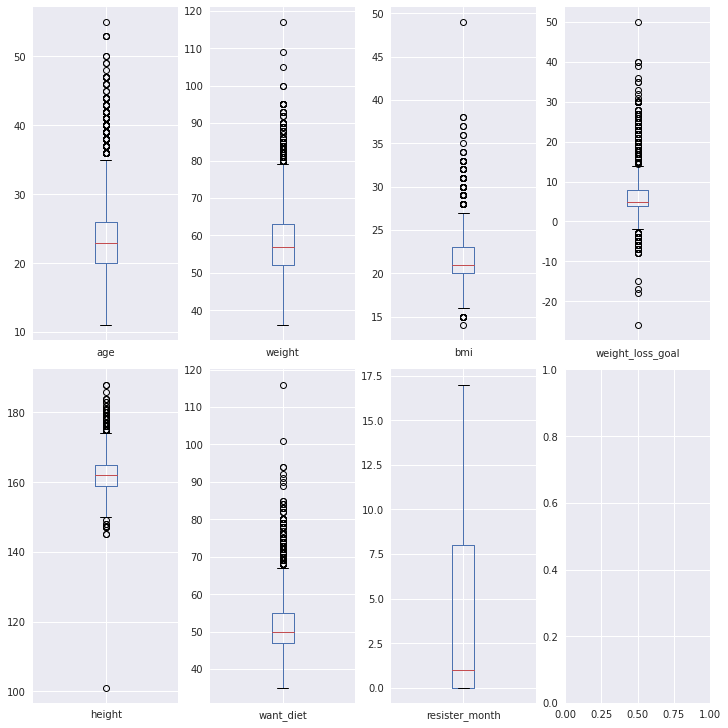

In [92]:
df_outlier = df.drop(['sex','married', 'pclass', 'Disease_status', 'Diet_experience', 'student', 'housewife',
       'etc', 'officeworker', 'forwhat'], axis=1)

%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumBarunGothic"

ncols = 4
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((10, 10))

for col, ax in zip(df_outlier.columns, axs.T.ravel()):
    df_outlier[[col]].boxplot(ax = ax)
    
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IP

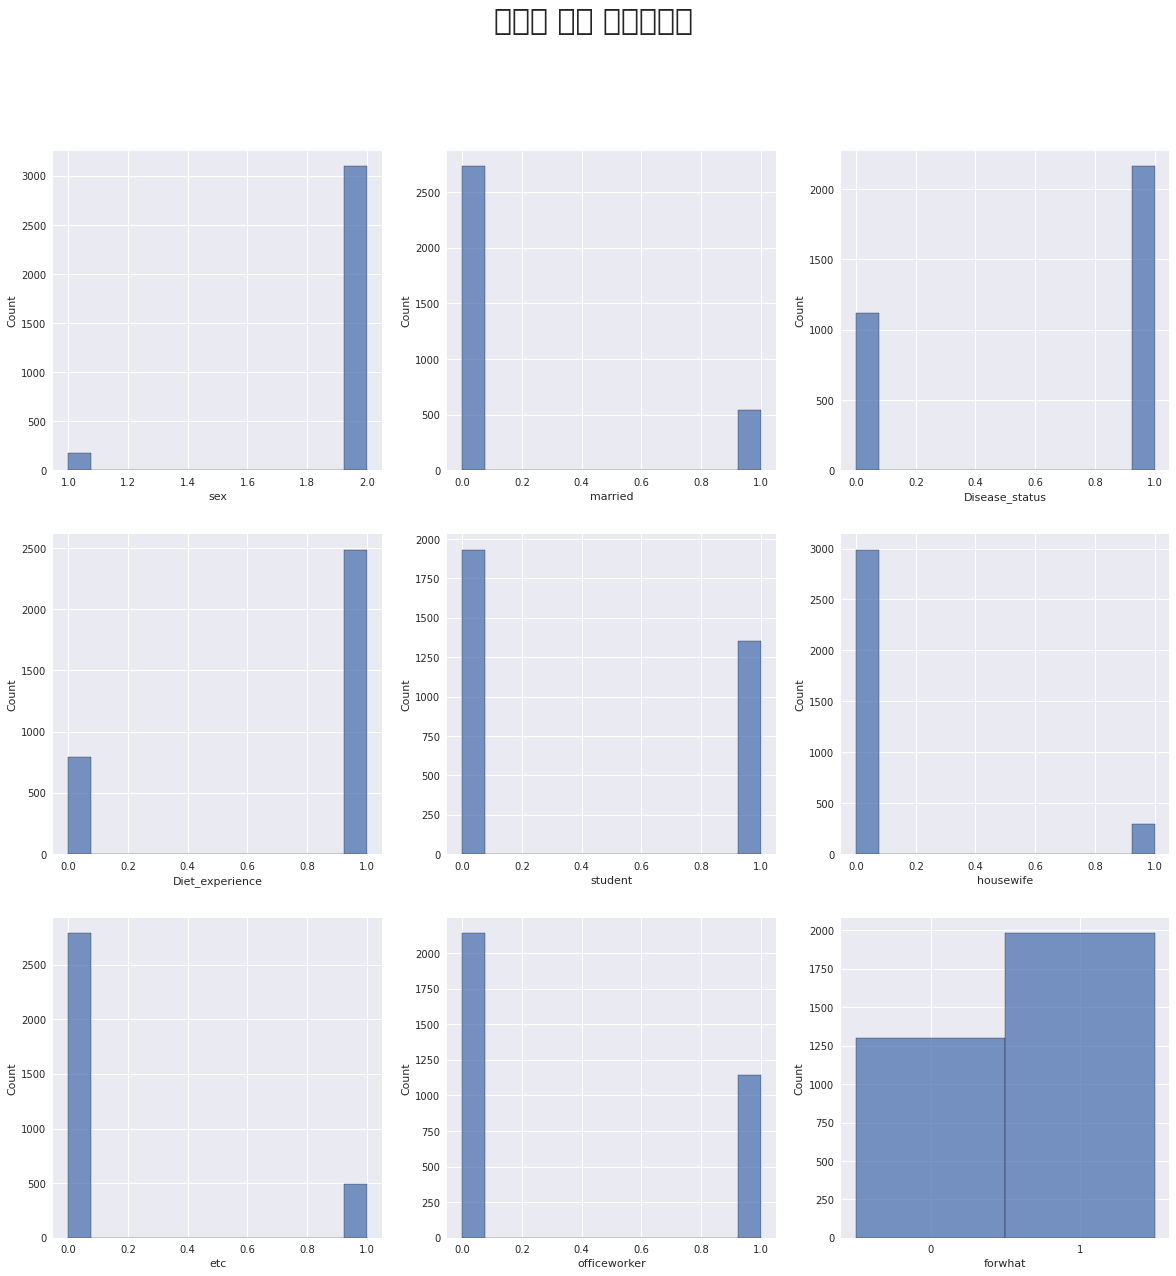

In [93]:
#히스토그램 시각화 한번에 합친 코드
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

sns.histplot(df['sex'], ax=ax[0,0])
sns.histplot(df['married'], ax=ax[0,1])
sns.histplot(df['Disease_status'], ax=ax[0,2])
sns.histplot(df['Diet_experience'], ax=ax[1,0])
sns.histplot(df['student'], ax=ax[1,1])
sns.histplot(df['housewife'], ax=ax[1,2])
sns.histplot(df['etc'], ax=ax[2,0])
sns.histplot(df['officeworker'], ax=ax[2,1])
sns.histplot(df['forwhat'], ax=ax[2,2])


# 그래프 제목 설정
plt.suptitle("범주형 변수 히스토그램", fontsize=30)

# 그래프 보여주기
plt.show()


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

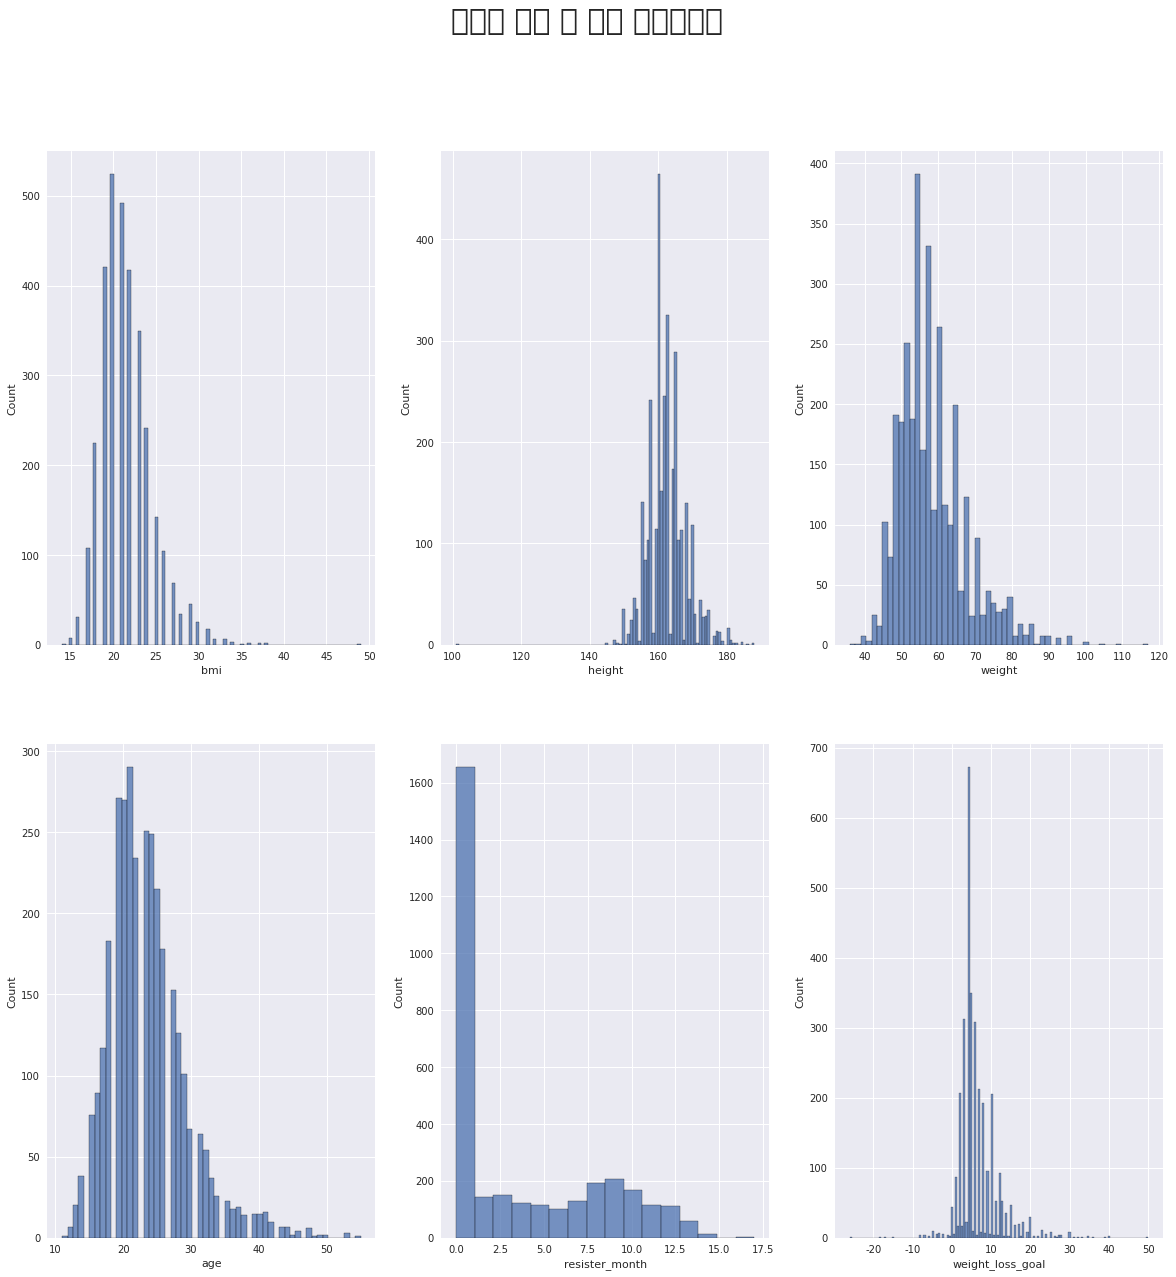

In [94]:
#히스토그램 시각화 한번에 합친 코드
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,20))

sns.histplot(df['bmi'], ax=ax[0,0])
sns.histplot(df['height'], ax=ax[0,1])
sns.histplot(df['weight'], ax=ax[0,2])
sns.histplot(df['age'], ax=ax[1,0])
sns.histplot(df['resister_month'], ax=ax[1,1])
sns.histplot(df['weight_loss_goal'], ax=ax[1,2])

# 그래프 제목 설정
plt.suptitle("이상치 제거 한 변수 히스토그램", fontsize=30)

# 그래프 보여주기
plt.show()

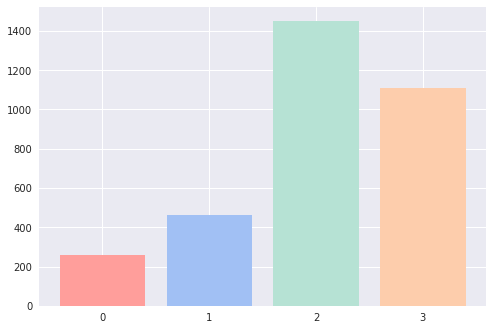

In [95]:
# 각 분류 값의 개수 구하기

unique, counts = np.unique(df['pclass'], return_counts=True)

# 막대 그래프 그리기
x_labels = unique.astype(str)
plt.bar(x_labels, counts, color=["#FF9E9B", "#A1C0F4", "#B6E2D4", "#FDCDAC"])
plt.show()

In [96]:
df

,age,sex,height,weight,married,want_diet,bmi,pclass,Disease_status,Diet_experience,student,housewife,etc,officeworker,forwhat,resister_month,weight_loss_goal
0,26.0,1.0,170.0,62.0,0.0,61.0,21.0,3,0,1,0,0,0,1,0,12,1.0
1,26.0,2.0,150.0,50.0,1.0,47.0,22.0,2,1,0,0,1,0,0,0,5,3.0
2,23.0,2.0,165.0,51.0,0.0,48.0,18.0,2,1,1,0,0,0,1,0,12,3.0
3,22.0,2.0,155.0,84.0,0.0,48.0,30.0,2,0,1,1,0,0,0,0,2,36.0
4,21.0,2.0,164.0,58.0,0.0,48.0,21.0,3,1,1,1,0,0,0,1,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,19.0,2.0,162.0,57.0,0.0,50.0,21.0,2,0,1,1,0,0,0,1,0,7.0
3279,15.0,1.0,175.0,72.0,0.0,68.0,23.0,2,0,0,1,0,0,0,0,0,4.0
3280,26.0,2.0,164.0,57.0,0.0,52.0,21.0,1,1,1,0,0,0,1,1,14,5.0
3281,15.0,2.0,147.0,42.0,0.0,39.0,19.0,2,0,1,1,0,0,0,1,0,3.0
